## K-means Clustering

### Load Datasets

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
x = df.iloc[:, :-1]
y = df['label']

### Model Training

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred = kmeans.predict(x)

### Visualization

[Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)')]

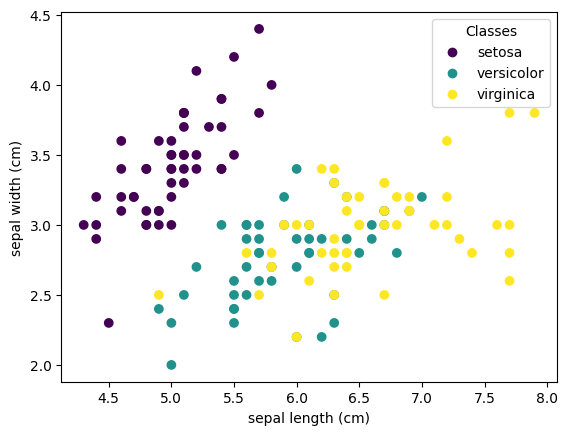

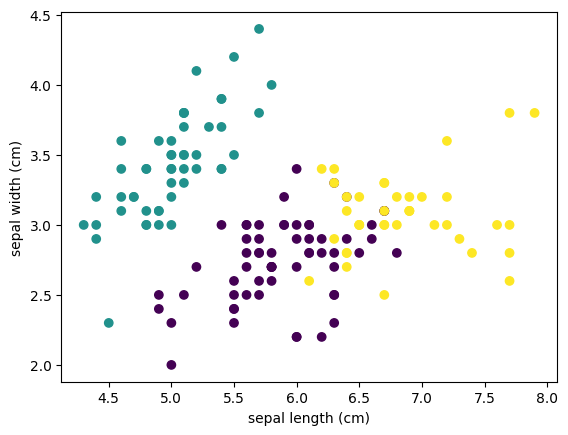

In [5]:
_, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['label'])
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names[:], loc='upper right', title='Classes')

_, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=pred)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

[Text(0.5, 0, 'petal length (cm)'), Text(0, 0.5, 'petal width (cm)')]

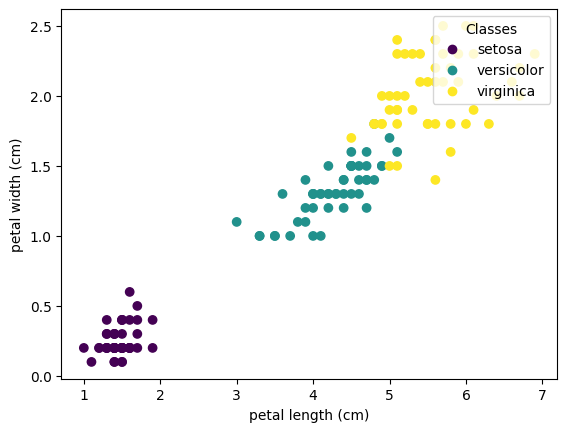

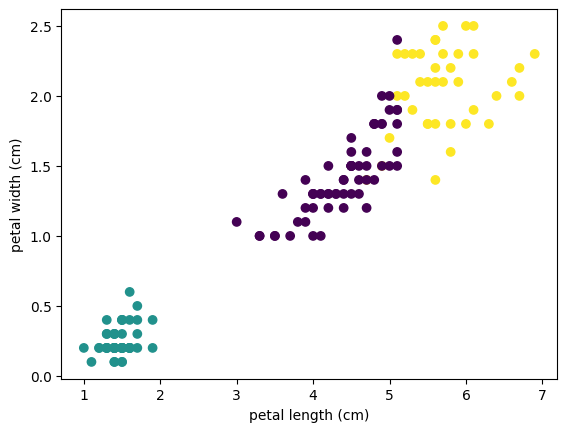

In [6]:
_, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df['label'])
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names[:], loc='upper right', title='Classes')

_, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 2], df.iloc[:, 3], c=pred)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])

In [7]:
sum_of_squared_distances = []
k = range(1, 15)
for i in k:
    km = KMeans(n_clusters=i)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

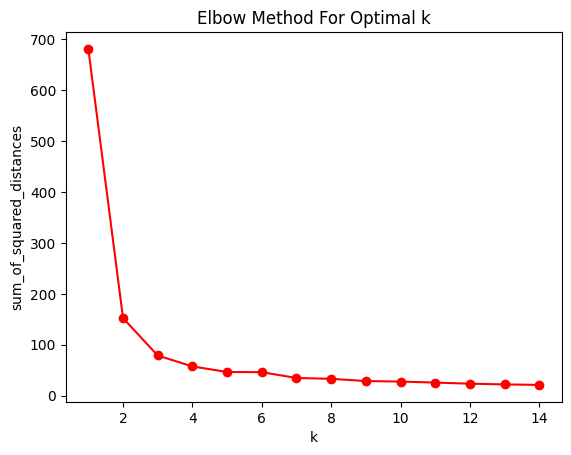

In [8]:
plt.plot(k, sum_of_squared_distances, 'ro-')
plt.xlabel("k")
plt.ylabel("sum_of_squared_distances")
plt.title("Elbow Method For Optimal k")
plt.show()

## Linear Regression

### Load Datasets

In [9]:
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
x = diabetes.data[:, 2]
y = diabetes.target

x = x.reshape(-1, 1)

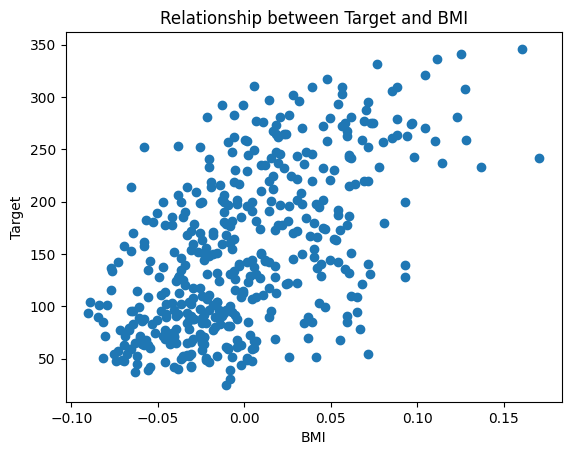

In [11]:
plt.scatter(x, y)
plt.xlabel("BMI")
plt.ylabel("Target")
plt.title("Relationship between Target and BMI")
plt.show()

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class DiabetesDataset(Dataset):
    def __init__(self, data):
        self.x_data = torch.tensor(data.data, dtype=torch.float32)
        self.y_data = torch.tensor(data.target, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

### Dataloaders

In [13]:
diabetes_dataset = DiabetesDataset(diabetes)

In [14]:
train_size = int(len(diabetes_dataset) * 0.7)
val_size = int(len(diabetes_dataset) - train_size)
train_dataset, val_dataset = random_split(diabetes_dataset, [train_size, val_size])

In [15]:
len(train_dataset), len(val_dataset)

(309, 133)

In [16]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=8, shuffle=False)

### Model Definition

In [17]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        return self.linear(x)

In [18]:
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Training Loop

In [19]:
EPOCHS = 1000
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

Epoch [50/1000], Train Loss: 4643.5132, Val Loss: 5326.2507
Epoch [100/1000], Train Loss: 4027.4385, Val Loss: 4641.0813
Epoch [150/1000], Train Loss: 3669.6547, Val Loss: 4246.2652
Epoch [200/1000], Train Loss: 3436.3745, Val Loss: 3990.6698
Epoch [250/1000], Train Loss: 3288.5587, Val Loss: 3820.7442
Epoch [300/1000], Train Loss: 3169.9156, Val Loss: 3715.7942
Epoch [350/1000], Train Loss: 3084.6329, Val Loss: 3633.0071
Epoch [400/1000], Train Loss: 3018.5895, Val Loss: 3571.7967
Epoch [450/1000], Train Loss: 2968.5708, Val Loss: 3520.1664
Epoch [500/1000], Train Loss: 2922.0043, Val Loss: 3481.4061
Epoch [550/1000], Train Loss: 2885.6111, Val Loss: 3459.9216
Epoch [600/1000], Train Loss: 2859.3537, Val Loss: 3443.1970
Epoch [650/1000], Train Loss: 2832.5992, Val Loss: 3427.5374
Epoch [700/1000], Train Loss: 2810.8229, Val Loss: 3414.9816
Epoch [750/1000], Train Loss: 2791.8864, Val Loss: 3405.2080
Epoch [800/1000], Train Loss: 2778.9441, Val Loss: 3387.3933
Epoch [850/1000], Train L

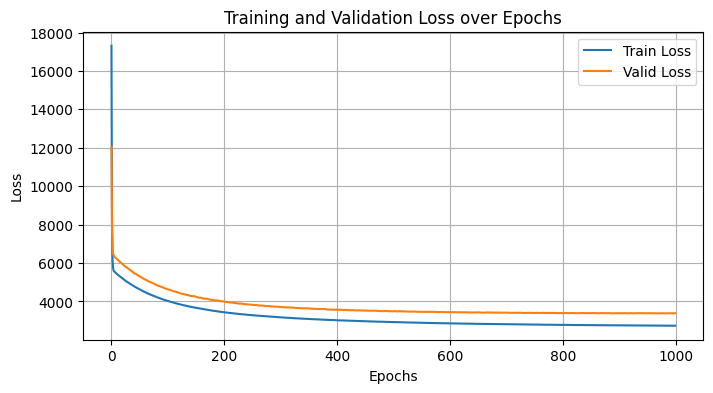

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(range(EPOCHS), train_losses, label='Train Loss')
plt.plot(range(EPOCHS), val_losses, label='Valid Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

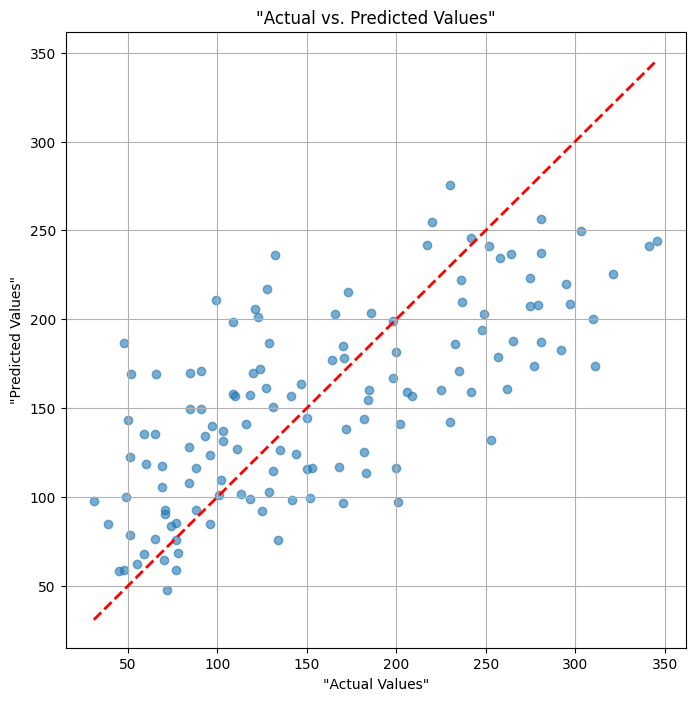

In [21]:
model.eval()

all_actuals = []
all_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        all_predictions.extend(outputs.numpy())
        all_actuals.extend(targets.numpy())

plt.figure(figsize=(8, 8))
plt.scatter(all_actuals, all_predictions, alpha=0.6)
plt.xlabel('"Actual Values"'); plt.ylabel('"Predicted Values"')
plt.title('"Actual vs. Predicted Values"')
min_val = min(min(all_actuals), min(all_predictions))
max_val= max(max(all_actuals), max(all_predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.grid(True)
plt.show()

## Binary Classification

### Load Dataset

In [22]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
class IrisDataset(Dataset):
    def __init__(self, data):
        self.x_data = iris.data[iris.target != 2]
        self.y_data = iris.target[iris.target != 2]
        self.x_data = torch.tensor(self.x_data, dtype=torch.float32)
        self.y_data = torch.tensor(self.y_data, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

### Dataloaders

In [24]:
iris_dataset = IrisDataset(iris)

In [25]:
train_size = int(len(iris_dataset) * 0.7)
val_size = int(len(iris_dataset) - train_size)
train_dataset, val_dataset = random_split(iris_dataset, [train_size, val_size])

In [26]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=8, shuffle=False)

### Model Definition

In [27]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [33]:
model = LogisticRegressionModel(4, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

### Training Loop

In [34]:
epochs = 20

for epoch in range(epochs):
    train_loss, val_loss = 0.0, 0.0
    correct_train, correct_val = 0, 0

    model.train()
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        predicted = (outputs >= 0.5).float()
        correct_train += (predicted == targets).sum().item()

    train_acc = correct_train / len(train_dataset)

    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            predicted = (outputs >= 0.5).float()
            correct_val += (predicted == targets).sum().item()
    val_acc = correct_val / len(val_dataset)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch [1/20], Train Loss: 0.8114, Val Loss: 0.8230, Train Acc: 0.5286, Val Acc: 0.4333
Epoch [2/20], Train Loss: 0.7161, Val Loss: 0.7443, Train Acc: 0.5286, Val Acc: 0.4333
Epoch [3/20], Train Loss: 0.6715, Val Loss: 0.6856, Train Acc: 0.5286, Val Acc: 0.4333
Epoch [4/20], Train Loss: 0.6344, Val Loss: 0.6465, Train Acc: 0.5286, Val Acc: 0.4333
Epoch [5/20], Train Loss: 0.6007, Val Loss: 0.6040, Train Acc: 0.5286, Val Acc: 0.5333
Epoch [6/20], Train Loss: 0.5691, Val Loss: 0.5799, Train Acc: 0.7857, Val Acc: 0.5667
Epoch [7/20], Train Loss: 0.5434, Val Loss: 0.5430, Train Acc: 0.7000, Val Acc: 0.9667
Epoch [8/20], Train Loss: 0.5192, Val Loss: 0.5153, Train Acc: 0.9429, Val Acc: 1.0000
Epoch [9/20], Train Loss: 0.4896, Val Loss: 0.4934, Train Acc: 1.0000, Val Acc: 1.0000
Epoch [10/20], Train Loss: 0.4680, Val Loss: 0.4671, Train Acc: 1.0000, Val Acc: 1.0000
Epoch [11/20], Train Loss: 0.4440, Val Loss: 0.4466, Train Acc: 1.0000, Val Acc: 1.0000
Epoch [12/20], Train Loss: 0.4277, Val Lo